In [1]:
import tensorflow as tf
import numpy as np


In [2]:
data_dir = "Teeth_Dataset/Training"

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels="inferred",
    label_mode="int",        
    image_size=(224, 224),   
    batch_size=32,           
    shuffle=True,            
    seed=42
)

Found 3087 files belonging to 7 classes.


In [3]:
data_dir = "Teeth_Dataset/Validation"

validation_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels="inferred",
    label_mode="int",        
    image_size=(224, 224),   
    batch_size=32,           
    shuffle=True,            
    seed=42
)

Found 1028 files belonging to 7 classes.


In [4]:
data_dir = "Teeth_Dataset/Testing/testing"

test_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels="inferred",
    label_mode="int",        
    image_size=(224, 224),   
    batch_size=32,           
    shuffle=True,            
    seed=42
)

Found 1028 files belonging to 7 classes.


In [5]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
validation_ds = validation_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

In [11]:
import matplotlib.pyplot as plt

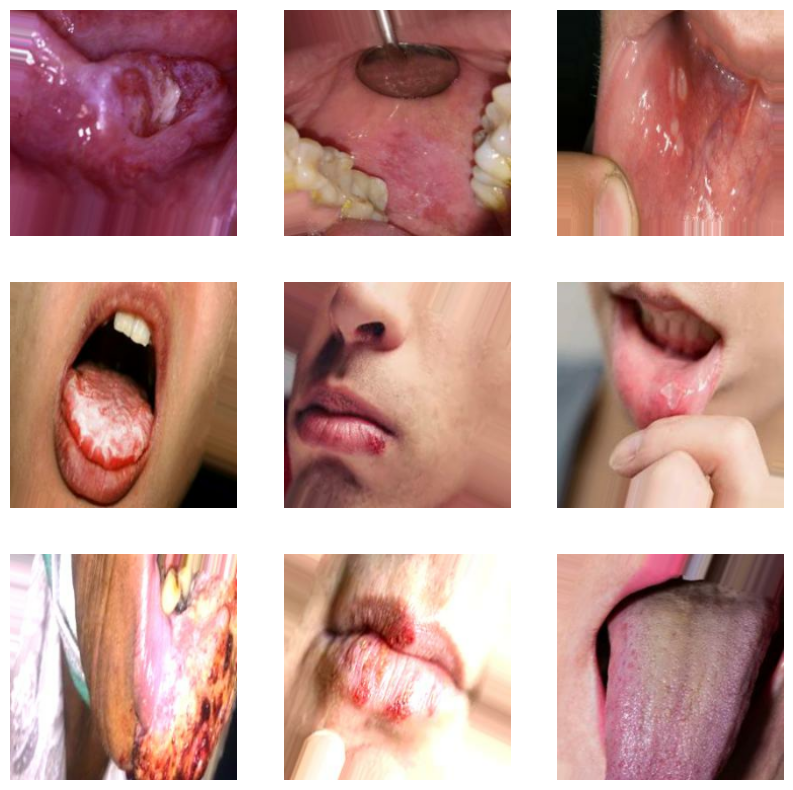

In [13]:
plt.figure(figsize=(10, 10))

for images, labels in train_ds.take(1):  
    for i in range(9):  
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy())  
        plt.axis("off")

In [15]:
base_model = tf.keras.applications.InceptionResNetV2(
    input_shape=(224, 224,3),
    include_top=False,
    weights="imagenet"
)



In [16]:
base_model.trainable = True

In [17]:
for layer in base_model.layers[:600]:
    layer.trainable = False

In [21]:
model2 = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(7, activation="softmax")
])

model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [23]:
history2 = model2.fit(train_ds, validation_data=validation_ds, epochs=8)

Epoch 1/8
97/97 ━━━━━━━━━━━━━━━━━━━━ 193s 2s/step - accuracy: 0.6307 - loss: 1.1141 - val_accuracy: 0.5146 - val_loss: 2.2851
Epoch 2/8
97/97 ━━━━━━━━━━━━━━━━━━━━ 157s 2s/step - accuracy: 0.9441 - loss: 0.1652 - val_accuracy: 0.4835 - val_loss: 3.0131
Epoch 3/8
97/97 ━━━━━━━━━━━━━━━━━━━━ 155s 2s/step - accuracy: 0.9801 - loss: 0.0724 - val_accuracy: 0.9348 - val_loss: 0.1899
Epoch 4/8
97/97 ━━━━━━━━━━━━━━━━━━━━ 160s 2s/step - accuracy: 0.9901 - loss: 0.0438 - val_accuracy: 0.9407 - val_loss: 0.2057
Epoch 5/8
97/97 ━━━━━━━━━━━━━━━━━━━━ 157s 2s/step - accuracy: 0.9885 - loss: 0.0475 - val_accuracy: 0.9669 - val_loss: 0.0946
Epoch 6/8
97/97 ━━━━━━━━━━━━━━━━━━━━ 156s 2s/step - accuracy: 0.9876 - loss: 0.0415 - val_accuracy: 0.9076 - val_loss: 0.2895
Epoch 7/8
97/97 ━━━━━━━━━━━━━━━━━━━━ 154s 2s/step - accuracy: 0.9817 - loss: 0.0570 - val_accuracy: 0.8093 - val_loss: 0.8856
Epoch 8/8
97/97 ━━━━━━━━━━━━━━━━━━━━ 157s 2s/step - accuracy: 0.9893 - loss: 0.0374 - val_accuracy: 0.9854 - val_loss:

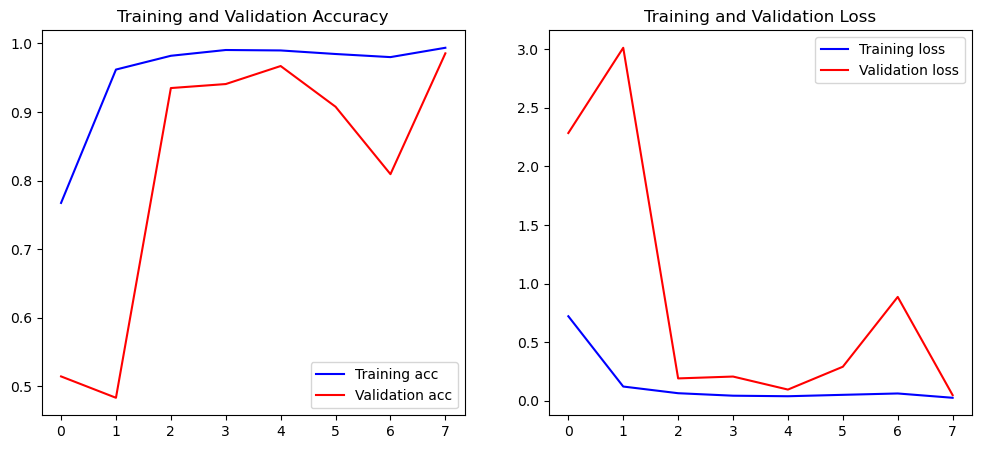

In [25]:
history3 = history2.history

acc = history3['accuracy']
val_acc = history3['val_accuracy']   
loss = history3['loss']
val_loss = history3['val_loss']

epochs = range(len(acc))


import matplotlib.pyplot as plt

def plot_acc_loss(acc, val_acc, loss, val_loss, epochs):
    plt.figure(figsize=(12,5))

  
    plt.subplot(1,2,1)
    plt.plot(epochs, acc, 'b', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title('Training and Validation Accuracy')
    plt.legend()

   
    plt.subplot(1,2,2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()


plot_acc_loss(acc, val_acc, loss, val_loss,epochs)

In [27]:
model2.save("oral_model2.keras")

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 965ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 964ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 924ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 926ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 978ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 986ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 972ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 951ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 978ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 946ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 912ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 895ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 926ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 929ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 968ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 941ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 910ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 908ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 931ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 927ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 915ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 912ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 914ms/

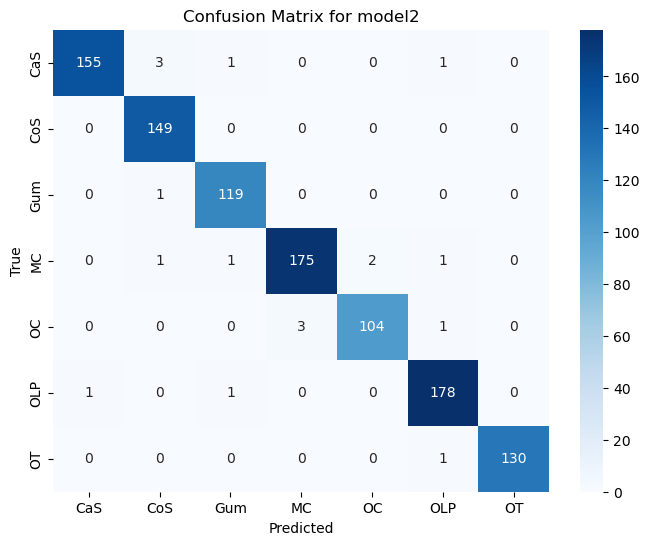


Classification Report:

              precision    recall  f1-score   support

         CaS       0.99      0.97      0.98       160
         CoS       0.97      1.00      0.98       149
         Gum       0.98      0.99      0.98       120
          MC       0.98      0.97      0.98       180
          OC       0.98      0.96      0.97       108
         OLP       0.98      0.99      0.98       180
          OT       1.00      0.99      1.00       131

    accuracy                           0.98      1028
   macro avg       0.98      0.98      0.98      1028
weighted avg       0.98      0.98      0.98      1028



In [28]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
class_names = ["CaS", "CoS", "Gum", "MC", "OC", "OLP", "OT"]

y_true = []
y_pred = []

for images, labels in test_ds:
    preds = model2.predict(images)
    y_true.extend(labels.numpy())               
    y_pred.extend(np.argmax(preds, axis=1))    

y_true = np.array(y_true)
y_pred = np.array(y_pred)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for model2")
plt.show()

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))